In [23]:
!pip install numpy h5py sklearn keras tensorflow==1.13.2 cv2

  ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [13]:
import numpy as np
from getdata import load
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras import backend as K
K.set_image_dim_ordering('th')
# from keras import backend as K
# K.image_data_format()
# K.set_image_data_format('channels_last')

# from keras import backend as K
# if K.image_data_format() == 'channels_first':
#     input_shape = (IMG_CHANNELS, IMG_WIDTH, IMG_HEIGHT)
# else:
#     input_shape = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packag

In [14]:
import keras
print(keras.__version__)


2.0.3


In [15]:
x_train, x_test, y_train, y_test = load()

/home/jovyan/getdata.py:5: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File("dataset.h5")
/home/jovyan/getdata.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  x = f['x'].value
/home/jovyan/getdata.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  y = f['y'].value


In [16]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [17]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),padding='same',input_shape=(3 , 100, 100)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]


In [18]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.load_weights("weights.hdf5")

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 100, 100)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 100, 100)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 98, 98)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 98, 98)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 49, 49)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 49, 49)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 49, 49)        18496     
__________

In [20]:
out = model.predict_proba(x_test)
out = np.array(out)

400/400 [==============================] - 29s    


In [21]:
out

array([[5.2507609e-02, 3.8186568e-01, 7.1154529e-01, 3.0390650e-02,
        2.5219274e-01],
       [5.2688926e-02, 9.6207857e-04, 2.9357934e-01, 9.7215855e-01,
        5.1468074e-02],
       [3.4988254e-02, 3.7103593e-03, 5.9768951e-01, 9.7031152e-01,
        2.6501119e-03],
       ...,
       [1.7532220e-01, 4.2968392e-03, 3.1814855e-01, 9.0944862e-01,
        3.3014745e-02],
       [4.8627555e-03, 5.0062865e-02, 5.5479068e-01, 3.9214790e-03,
        4.1428521e-01],
       [3.6632359e-02, 5.5755812e-01, 4.7813889e-01, 7.0935190e-03,
        2.3756996e-01]], dtype=float32)

In [22]:
threshold = np.arange(0.1,0.9,0.1)

acc = []
accuracies = []
best_threshold = np.zeros(out.shape[1])
for i in range(out.shape[1]):
    y_prob = np.array(out[:,i])
    for j in threshold:
        y_pred = [1 if prob>=j else 0 for prob in y_prob]
        acc.append( matthews_corrcoef(y_test[:,i],y_pred))
    acc   = np.array(acc)
    index = np.where(acc==acc.max()) 
    accuracies.append(acc.max()) 
    best_threshold[i] = threshold[index[0][0]]
    acc = []

In [23]:
best_threshold

array([0.6, 0.3, 0.5, 0.3, 0.7])

In [24]:
y_pred = np.array([[1 if out[i,j]>=best_threshold[j] else 0 for j in range(y_test.shape[1])] for i in range(len(y_test))])

In [25]:
y_pred  #predicted labels

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [26]:
y_test #actual labels

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [27]:
hamming_loss(y_test,y_pred)  #the loss should be as low as possible and the range is from 0 to 1

0.1345

In [28]:
total_correctly_predicted = len([i for i in range(len(y_test)) if (y_test[i]==y_pred[i]).sum() == 5])

In [29]:
total_correctly_predicted/400. #exact accuracy for eg y_pred = [0,0,1,1,1] and y_test=[0,0,1,1,1]

0.565

In [30]:
total_correctly_predicted

226

In [31]:
from IPython.display import Image

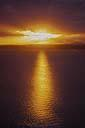

In [32]:
Image(filename='test_image.jpg') 

In [1]:
! pip install opencv-python
import cv2

     |████████████████████████████████| 28.3MB 30.1MB/s eta 0:00:01


In [2]:
img = cv2.imread("test_image.jpg")

In [3]:
img.shape

(128, 85, 3)

In [4]:
img = cv2.resize(img,(100,100))

In [5]:
img.shape

(100, 100, 3)

In [6]:
img = img.transpose((2,0,1))

In [7]:
img.shape

(3, 100, 100)

In [8]:
img = img.astype('float32')

In [9]:
img = img/255

In [33]:
img = np.expand_dims(img,axis=0)

In [34]:
img.shape

(1, 3, 100, 100)

In [35]:
pred = model.predict(img)

In [36]:
pred

array([[0.01455029, 0.00821207, 0.62925774, 0.98992926, 0.0071043 ]],
      dtype=float32)

In [37]:
y_pred = np.array([1 if pred[0,i]>=best_threshold[i] else 0 for i in range(pred.shape[1])])

In [38]:
y_pred

array([0, 0, 1, 1, 0])

In [39]:
classes = ['desert','mountains','sea','sunset','trees']

In [40]:
[classes[i] for i in range(5) if y_pred[i]==1 ]  #extracting actual class name

['sea', 'sunset']